In [0]:
import pandas as pd

In [0]:
dnd_df = pd.read_csv("https://raw.githubusercontent.com/ErikSeguinte/dndstats/master/docs/charTable.tsv", sep = '\t')

In [3]:
dnd_df.head()

,name,race,background,date,class,justClass,subclass,level,feats,HP,AC,Str,Dex,Con,Int,Wis,Cha,alignment,skills,weapons,spells,day,processedAlignment,good,lawful,processedRace,processedSpells,processedWeapons
0,9f3a61,Human,Charlatan,2018-07-27T23:53:51Z,Warlock 1,Warlock,The Fiend,1,Lucky,8,12,10,13,16,8,10,16,CN,Sleight of Hand|Insight|Perception|Deception|I...,"Crossbow, light|Eldritch Blast PHB237|Burning ...",Eldritch blast*0|Minor illusion*0|Hex*1|Burnin...,07 27 18,CN,N,C,Human,Eldritch Blast*0|Minor Illusion*0|Hex*1|Burnin...,"Crossbow, Light|Dagger"
1,9f3a61,Human,Custom,2018-07-27T17:07:02Z,Warlock 1,Warlock,The Fiend,1,Lucky,8,12,10,13,16,8,10,16,CN,Insight|Deception|Intimidation,"Crossbow, light|Eldritch Blast PHB237|Burning ...",Eldritch blast*0|Minor illusion*0|Hex*1|Burnin...,07 27 18,CN,N,C,Human,Eldritch Blast*0|Minor Illusion*0|Hex*1|Burnin...,"Crossbow, Light|Dagger"
2,7a2bfc,Kenku,Criminal,2018-05-27T20:14:52Z,Warlock 3,Warlock,The Celestial,3,NaN,13,13,8,15,10,14,13,15,NaN,Sleight of Hand|Stealth|Arcana|Religion|Deception,"Crossbow, Light|Dagger",Light*0|Sacred Flame*0|Eldritch Blast*0|Agoniz...,05 27 18,NaN,NaN,NaN,Kenku,Light*0|Sacred Flame*0|Eldritch Blast*0|Eldrit...,"Crossbow, Light|Dagger"
3,aa8854,High Elf,Criminal,2018-08-04T15:45:17Z,Wizard 1,Wizard,NaN,1,NaN,7,13,10,16,13,16,12,8,NaN,Stealth|Arcana|Investigation|Perception|Deception,Quarterstaff,NaN,08 04 18,NaN,NaN,NaN,Elf,NaN,Quarterstaff
4,26410c,Firbolg,Folk Hero,2018-07-26T03:31:17Z,Cleric 4,Cleric,Trickery Domain,4,Inspiring Leader,42,16,16,11,18,13,18,14,NaN,History|Animal Handling|Insight|Survival,"Mace|Crossbow, light",Charm Person*1|Disguise Self*1|Mirror Image*2|...,07 25 18,NaN,NaN,NaN,Firbolg,Charm Person*1|Disguise Self*1|Mirror Image*2|...,"Mace|Crossbow, Light"


In [4]:
pd.set_option('display.max_rows', 10)
dnd_df['class'].value_counts()


Fighter 1                     50
Rogue 1                       44
Cleric 1                      32
Ranger 1                      30
Sorcerer 1                    29
                              ..
Rogue 5|Cleric 3|Ranger 12     1
Druid 5|Rogue 3                1
Cleric 1|Bard 3                1
Fighter 1|Barbarian 1          1
Bard 3|Rogue 2|Fighter 5       1
Name: class, Length: 309, dtype: int64

In [5]:
dnd_df['class'] = dnd_df['class'].str.split('|')
dnd_df['class']

0                  [Warlock 1]
1                  [Warlock 1]
2                  [Warlock 3]
3                   [Wizard 1]
4                   [Cleric 4]
                 ...          
1342              [Warlock 20]
1343              [Paladin 20]
1344    [Wizard 20, Cleric 10]
1345                [Druid 12]
1346             [Barbarian 3]
Name: class, Length: 1347, dtype: object

In [6]:
# Drop anyone with more than 2 classes
valid_multiclass = dnd_df['class'].str.len() <= 2
dnd_df = dnd_df[valid_multiclass]
dnd_df.head(5)

,name,race,background,date,class,justClass,subclass,level,feats,HP,AC,Str,Dex,Con,Int,Wis,Cha,alignment,skills,weapons,spells,day,processedAlignment,good,lawful,processedRace,processedSpells,processedWeapons
0,9f3a61,Human,Charlatan,2018-07-27T23:53:51Z,[Warlock 1],Warlock,The Fiend,1,Lucky,8,12,10,13,16,8,10,16,CN,Sleight of Hand|Insight|Perception|Deception|I...,"Crossbow, light|Eldritch Blast PHB237|Burning ...",Eldritch blast*0|Minor illusion*0|Hex*1|Burnin...,07 27 18,CN,N,C,Human,Eldritch Blast*0|Minor Illusion*0|Hex*1|Burnin...,"Crossbow, Light|Dagger"
1,9f3a61,Human,Custom,2018-07-27T17:07:02Z,[Warlock 1],Warlock,The Fiend,1,Lucky,8,12,10,13,16,8,10,16,CN,Insight|Deception|Intimidation,"Crossbow, light|Eldritch Blast PHB237|Burning ...",Eldritch blast*0|Minor illusion*0|Hex*1|Burnin...,07 27 18,CN,N,C,Human,Eldritch Blast*0|Minor Illusion*0|Hex*1|Burnin...,"Crossbow, Light|Dagger"
2,7a2bfc,Kenku,Criminal,2018-05-27T20:14:52Z,[Warlock 3],Warlock,The Celestial,3,NaN,13,13,8,15,10,14,13,15,NaN,Sleight of Hand|Stealth|Arcana|Religion|Deception,"Crossbow, Light|Dagger",Light*0|Sacred Flame*0|Eldritch Blast*0|Agoniz...,05 27 18,NaN,NaN,NaN,Kenku,Light*0|Sacred Flame*0|Eldritch Blast*0|Eldrit...,"Crossbow, Light|Dagger"
3,aa8854,High Elf,Criminal,2018-08-04T15:45:17Z,[Wizard 1],Wizard,NaN,1,NaN,7,13,10,16,13,16,12,8,NaN,Stealth|Arcana|Investigation|Perception|Deception,Quarterstaff,NaN,08 04 18,NaN,NaN,NaN,Elf,NaN,Quarterstaff
4,26410c,Firbolg,Folk Hero,2018-07-26T03:31:17Z,[Cleric 4],Cleric,Trickery Domain,4,Inspiring Leader,42,16,16,11,18,13,18,14,NaN,History|Animal Handling|Insight|Survival,"Mace|Crossbow, light",Charm Person*1|Disguise Self*1|Mirror Image*2|...,07 25 18,NaN,NaN,NaN,Firbolg,Charm Person*1|Disguise Self*1|Mirror Image*2|...,"Mace|Crossbow, Light"


In [7]:
# Split Class list into 2 columns, class 1 and 2
dnd_df[['class1', 'class2']] = pd.DataFrame(dnd_df['class'].values.tolist(), index = dnd_df.index)
dnd_df.head()

,name,race,background,date,class,justClass,subclass,level,feats,HP,AC,Str,Dex,Con,Int,Wis,Cha,alignment,skills,weapons,spells,day,processedAlignment,good,lawful,processedRace,processedSpells,processedWeapons,class1,class2
0,9f3a61,Human,Charlatan,2018-07-27T23:53:51Z,[Warlock 1],Warlock,The Fiend,1,Lucky,8,12,10,13,16,8,10,16,CN,Sleight of Hand|Insight|Perception|Deception|I...,"Crossbow, light|Eldritch Blast PHB237|Burning ...",Eldritch blast*0|Minor illusion*0|Hex*1|Burnin...,07 27 18,CN,N,C,Human,Eldritch Blast*0|Minor Illusion*0|Hex*1|Burnin...,"Crossbow, Light|Dagger",Warlock 1,None
1,9f3a61,Human,Custom,2018-07-27T17:07:02Z,[Warlock 1],Warlock,The Fiend,1,Lucky,8,12,10,13,16,8,10,16,CN,Insight|Deception|Intimidation,"Crossbow, light|Eldritch Blast PHB237|Burning ...",Eldritch blast*0|Minor illusion*0|Hex*1|Burnin...,07 27 18,CN,N,C,Human,Eldritch Blast*0|Minor Illusion*0|Hex*1|Burnin...,"Crossbow, Light|Dagger",Warlock 1,None
2,7a2bfc,Kenku,Criminal,2018-05-27T20:14:52Z,[Warlock 3],Warlock,The Celestial,3,NaN,13,13,8,15,10,14,13,15,NaN,Sleight of Hand|Stealth|Arcana|Religion|Deception,"Crossbow, Light|Dagger",Light*0|Sacred Flame*0|Eldritch Blast*0|Agoniz...,05 27 18,NaN,NaN,NaN,Kenku,Light*0|Sacred Flame*0|Eldritch Blast*0|Eldrit...,"Crossbow, Light|Dagger",Warlock 3,None
3,aa8854,High Elf,Criminal,2018-08-04T15:45:17Z,[Wizard 1],Wizard,NaN,1,NaN,7,13,10,16,13,16,12,8,NaN,Stealth|Arcana|Investigation|Perception|Deception,Quarterstaff,NaN,08 04 18,NaN,NaN,NaN,Elf,NaN,Quarterstaff,Wizard 1,None
4,26410c,Firbolg,Folk Hero,2018-07-26T03:31:17Z,[Cleric 4],Cleric,Trickery Domain,4,Inspiring Leader,42,16,16,11,18,13,18,14,NaN,History|Animal Handling|Insight|Survival,"Mace|Crossbow, light",Charm Person*1|Disguise Self*1|Mirror Image*2|...,07 25 18,NaN,NaN,NaN,Firbolg,Charm Person*1|Disguise Self*1|Mirror Image*2|...,"Mace|Crossbow, Light",Cleric 4,None


In [8]:
dnd_df.sample(5)

,name,race,background,date,class,justClass,subclass,level,feats,HP,AC,Str,Dex,Con,Int,Wis,Cha,alignment,skills,weapons,spells,day,processedAlignment,good,lawful,processedRace,processedSpells,processedWeapons,class1,class2
12,4ed3b0,Mountain Dwarf,Outlander,2018-09-09T08:41:39Z,[Barbarian 8],Barbarian,Path of the Totem Warrior,8,NaN,101,22,20,20,20,12,14,18,Chaotic Good,Athletics|Acrobatics|Stealth|Perception|Surviv...,Hazirawn/Nec|Battleaxe|Warhammer|Javelin,Detect Magic (1)*0|Detect Good and Evil (1)*0|...,09 09 18,CG,G,C,Dwarf,*,Battleaxe|Warhammer|Javelin,Barbarian 8,None
231,cefbd5,Turtle,Knight,2018-07-07T05:17:24Z,[Paladin 1],Paladin,NaN,1,NaN,11,14,17,14,13,10,15,18,Lawful Good,Athletics|Nature|Medicine|Survival|Persuasion,Greataxe|Maul|Unarmed Strike,NaN,07 06 18,LG,G,L,Turtle,NaN,Greataxe|Maul|Unarmed Strike,Paladin 1,None
1298,cb5042,Dragonborn,Sailor,2018-05-21T13:24:25Z,"[Fighter 8, Revised Ranger 4]",Fighter|Revised Ranger,Sharpshooter|Hunter Conclave,12,Tough,113,18,15,20,14,10,13,11,CN,Athletics|Acrobatics|Stealth|History|Perceptio...,"Longbow|Rapier|Crossbow, light",Hunters Mark*1|Goodberry*1|Cure Wounds*1,05 21 18,CN,N,C,Dragonborn,Hunter’s Mark*1|Goodberry*1|Cure Wounds*1,"Longbow|Rapier|Crossbow, Light",Fighter 8,Revised Ranger 4
412,b8d995,Goliath,Criminal,2018-09-06T02:32:21Z,[Barbarian 1],Barbarian,NaN,1,NaN,15,15,17,15,16,8,8,8,Chaotic Neutral,Athletics|Stealth|Perception|Deception|Intimid...,Greataxe|Unarmed Strike,NaN,09 05 18,CN,N,C,Goliath,NaN,Greataxe|Unarmed Strike,Barbarian 1,None
1134,d7bb21,Mountain Dwarf,Soldier,2018-05-01T17:58:40Z,[Fighter 5],Fighter,Champion,5,NaN,44,18,19,14,14,10,11,10,NaN,Athletics|Perception|Survival|Intimidation,Dwarven Thrower|Dwarven Thrower,NaN,05 01 18,NaN,NaN,NaN,Dwarf,NaN,NaN,Fighter 5,None


In [21]:


dnd_df[['just_class1', 'just_level1']] = pd.DataFrame(dnd_df['class1'].str.split(" ",1, expand = True).values, index = dnd_df.index)
dnd_df.head()

,name,race,background,date,class,justClass,subclass,level,feats,HP,AC,Str,Dex,Con,Int,Wis,Cha,alignment,skills,weapons,spells,day,processedAlignment,good,lawful,processedRace,processedSpells,processedWeapons,class1,class2,just_class1,just_level1
0,9f3a61,Human,Charlatan,2018-07-27T23:53:51Z,[Warlock 1],Warlock,The Fiend,1,Lucky,8,12,10,13,16,8,10,16,CN,Sleight of Hand|Insight|Perception|Deception|I...,"Crossbow, light|Eldritch Blast PHB237|Burning ...",Eldritch blast*0|Minor illusion*0|Hex*1|Burnin...,07 27 18,CN,N,C,Human,Eldritch Blast*0|Minor Illusion*0|Hex*1|Burnin...,"Crossbow, Light|Dagger",Warlock 1,None,Warlock,1
1,9f3a61,Human,Custom,2018-07-27T17:07:02Z,[Warlock 1],Warlock,The Fiend,1,Lucky,8,12,10,13,16,8,10,16,CN,Insight|Deception|Intimidation,"Crossbow, light|Eldritch Blast PHB237|Burning ...",Eldritch blast*0|Minor illusion*0|Hex*1|Burnin...,07 27 18,CN,N,C,Human,Eldritch Blast*0|Minor Illusion*0|Hex*1|Burnin...,"Crossbow, Light|Dagger",Warlock 1,None,Warlock,1
2,7a2bfc,Kenku,Criminal,2018-05-27T20:14:52Z,[Warlock 3],Warlock,The Celestial,3,NaN,13,13,8,15,10,14,13,15,NaN,Sleight of Hand|Stealth|Arcana|Religion|Deception,"Crossbow, Light|Dagger",Light*0|Sacred Flame*0|Eldritch Blast*0|Agoniz...,05 27 18,NaN,NaN,NaN,Kenku,Light*0|Sacred Flame*0|Eldritch Blast*0|Eldrit...,"Crossbow, Light|Dagger",Warlock 3,None,Warlock,3
3,aa8854,High Elf,Criminal,2018-08-04T15:45:17Z,[Wizard 1],Wizard,NaN,1,NaN,7,13,10,16,13,16,12,8,NaN,Stealth|Arcana|Investigation|Perception|Deception,Quarterstaff,NaN,08 04 18,NaN,NaN,NaN,Elf,NaN,Quarterstaff,Wizard 1,None,Wizard,1
4,26410c,Firbolg,Folk Hero,2018-07-26T03:31:17Z,[Cleric 4],Cleric,Trickery Domain,4,Inspiring Leader,42,16,16,11,18,13,18,14,NaN,History|Animal Handling|Insight|Survival,"Mace|Crossbow, light",Charm Person*1|Disguise Self*1|Mirror Image*2|...,07 25 18,NaN,NaN,NaN,Firbolg,Charm Person*1|Disguise Self*1|Mirror Image*2|...,"Mace|Crossbow, Light",Cleric 4,None,Cleric,4


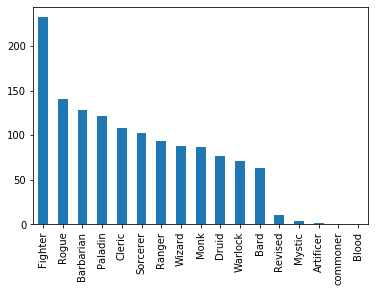

In [25]:
dnd_df['just_class1'].value_counts().plot(kind='bar');